In [61]:
import pandas as pd
import numpy as np
import nltk
import re
import string


In [62]:
# !pip install emoji
# !pip install tweet-preprocessor

In [63]:
import emoji
import preprocessor as p

In [64]:
from nltk.tokenize import TweetTokenizer

In [65]:
# !pip install openpyxl

In [66]:
g_files = ["/gryff.xlsx", "/gryff2.xlsx","/@gryff3.xlsx"]
g = []
for file in g_files:
    g.append(pd.read_excel(file,engine='openpyxl'))
    
g_df = pd.concat(g, ignore_index=True)
g_df = g_df[["Text"]]
g_df["House"] = "Gryffindor"
len(g_df)

8786

In [67]:
h_files = ["/huff.xlsx", "/huff2.xlsx",
          "/huff3.xlsx"]
h = []
for file in h_files:
    h.append(pd.read_excel(file,engine='openpyxl'))
    
h_df = pd.concat(h, ignore_index=True)
h_df = h_df[["Text"]]
h_df["House"] = "Hufflepuff"
len(h_df)

9271

In [68]:
s_files = ["/sly.xlsx", "sly2.xlsx","sly3.xlsx"]
s = []
for file in s_files:
    s.append(pd.read_excel(file,engine='openpyxl'))
    
s_df = pd.concat(s, ignore_index=True)
s_df = s_df[["Text"]]
s_df["House"] = "Slytherin"
s_df.head(5)
len(s_df)

9462

In [69]:
r_files = ["rav.xlsx", "rav2.xlsx","rav3.xlsx"]
r = []
for file in r_files:
    r.append(pd.read_excel(file, engine='openpyxl'))
    
r_df = pd.concat(r, ignore_index=True)
r_df = r_df[["Text"]]
r_df["House"] = "Ravenclaw"
len(r_df)

9576

In [70]:
df = pd.concat([g_df,r_df,s_df,h_df])
df.sample(10)
# df.head(10)

,Text,House
8311,The environmental implications of raising cows...,Gryffindor
7068,https://t.co/2CEEqis0Dy,Slytherin
7520,RT @Laura_Joyce_ : Spread the word. It needs t...,Hufflepuff
2378,RT @changamire_j : @HannahNMadzinga If Twitter...,Hufflepuff
4878,RT @quenblackwell : I take this “butt pad” acc...,Slytherin
7463,@flippinstarkids at the age of 23,Hufflepuff
1811,@emily_diana97 @cthuwuu @dannydevites @lexieje...,Gryffindor
6578,"RT @SacredSlytherin : Sometimes, when I study ...",Slytherin
5614,The best photo is of the most beautiful couple...,Gryffindor
93,@DMalfoysFlower *Draco began to pump his finge...,Slytherin


In [71]:
df.shape

(37095, 2)

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt


<AxesSubplot:xlabel='House', ylabel='Count'>

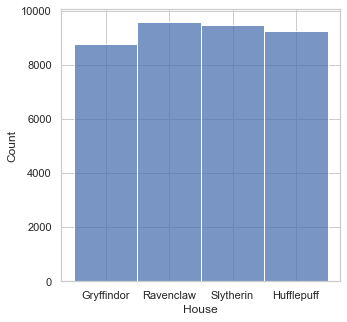

In [73]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(df, x="House",ax=ax)

In [74]:
df.describe

<bound method NDFrame.describe of                                                    Text       House
0     @illicitghosts @extendedhanleia @thorxraqnarok...  Gryffindor
1                                  @joeypqcey lana lang  Gryffindor
2     RT @buttrbeer : reminder that bi/pan lesbians ...  Gryffindor
3                               @oswinpxnd SO true sara  Gryffindor
4                layouts - 2021 https://t.co/lO6E1n8sYc  Gryffindor
...                                                 ...         ...
9266  @iamsilvercloud just a little bit http://t.co/...  Hufflepuff
9267  @iamsilvercloud I watched it when I got home f...  Hufflepuff
9268  @iamsilvercloud he is trying to be will its funny  Hufflepuff
9269  @iamsilvercloud I love it I have watched 3 tim...  Hufflepuff
9270  @iamsilvercloud yeah I'm good http://t.co/jk5h...  Hufflepuff

[37095 rows x 2 columns]>

In [75]:
df['Text']

0       @illicitghosts @extendedhanleia @thorxraqnarok...
1                                    @joeypqcey lana lang
2       RT @buttrbeer : reminder that bi/pan lesbians ...
3                                 @oswinpxnd SO true sara
4                  layouts - 2021 https://t.co/lO6E1n8sYc
                              ...                        
9266    @iamsilvercloud just a little bit http://t.co/...
9267    @iamsilvercloud I watched it when I got home f...
9268    @iamsilvercloud he is trying to be will its funny
9269    @iamsilvercloud I love it I have watched 3 tim...
9270    @iamsilvercloud yeah I'm good http://t.co/jk5h...
Name: Text, Length: 37095, dtype: object

In [76]:
p.set_options(p.OPT.URL, p.OPT.MENTION,p.OPT.NUMBER)

In [77]:
df['Text'] = df['Text'].apply(p.clean)
df['Text']

0                    tried to unf but they deactivated 💀💀
1                                               lana lang
2       RT : reminder that bi/pan lesbians do not exis...
3                                            SO true sara
4                                               layouts -
                              ...                        
9266                                    just a little bit
9267    I watched it when I got home from work I think...
9268                    he is trying to be will its funny
9269    I love it I have watched times today I found a...
9270                                        yeah I'm good
Name: Text, Length: 37095, dtype: object

In [78]:
df['Text'] = df['Text'].apply(lambda x: re.sub('RT',"",x))

In [79]:
df['Text'] = df['Text'].apply(emoji.demojize)

In [80]:
df['Text']

0        tried to unf but they deactivated :skull::skull:
1                                               lana lang
2        : reminder that bi/pan lesbians do not exist....
3                                            SO true sara
4                                               layouts -
                              ...                        
9266                                    just a little bit
9267    I watched it when I got home from work I think...
9268                    he is trying to be will its funny
9269    I love it I have watched times today I found a...
9270                                        yeah I'm good
Name: Text, Length: 37095, dtype: object

In [81]:
# from nltk.corpus import stopwords
# stop_words = stopwords.words('english')

In [82]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase.lower()


In [83]:
df['Text'] = df['Text'].apply(decontracted)

In [84]:
df['Text']

0        tried to unf but they deactivated :skull::skull:
1                                               lana lang
2        : reminder that bi/pan lesbians do not exist....
3                                            so true sara
4                                               layouts -
                              ...                        
9266                                    just a little bit
9267    i watched it when i got home from work i think...
9268                    he is trying to be will its funny
9269    i love it i have watched times today i found a...
9270                                       yeah i am good
Name: Text, Length: 37095, dtype: object

In [85]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        if punctuation != "_" :
            text = text.replace(punctuation, ' ')
    return text

In [86]:
df['Text'] = df['Text'] .apply(remove_punctuations)

In [131]:
df.sample(10)

,Text,House
416,a few other babies from other parents joined...,Slytherin
277,mazappy ered aya,Hufflepuff
6097,the show isn’t meant for him over his head,Gryffindor
6157,man america is imploding no we are not alri...,Ravenclaw
790,draco blushed as nibbled his ear lobe mmmm ...,Slytherin
3926,rolling_on_the_floor_laughing rolling_on_the...,Ravenclaw
7798,hugs you deserve support,Gryffindor
5671,yes i have to take the max number for them...,Slytherin
5946,underdeveloped plot line with a resisting woma...,Gryffindor
3996,rolling_on_the_floor_laughing rolling_on_the...,Ravenclaw


In [88]:
# tt = TweetTokenizer()
# df['Text'] = df['Text'].apply(tt.tokenize)

In [89]:
# df['Text'] = df['Text'].apply(lambda x: [item for item in x if item not in stop_words])

In [90]:
 df['Text'].head(5)

0     tried to unf but they deactivated  skull  skull 
1                                            lana lang
2       reminder that bi pan lesbians do not exist ...
3                                         so true sara
4                                            layouts  
Name: Text, dtype: object

In [91]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer,WordNetLemmatizer
lancaster = LancasterStemmer()
wordNet = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /Users/gowri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/gowri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/gowri/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [92]:
from sklearn.model_selection import train_test_split, cross_val_score

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import f1_score


pipeline = Pipeline([('vect', CountVectorizer (lowercase=True)),
                     ('tfidf', TfidfTransformer (use_idf=True,smooth_idf=True)),
                     ('clf', MultinomialNB (alpha=1))
                    ])


In [94]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df.House, test_size=0.2, random_state=123)

In [95]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=1))])

In [96]:
pred = pipeline.predict(X_test)

In [97]:
pred = pred.reshape(-1,1)

In [98]:
score = f1_score(y_test, pred,average="weighted")
score

0.6938865684124532

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, digits=4))

              precision    recall  f1-score   support

  Gryffindor     0.7901    0.5841    0.6716      1695
  Hufflepuff     0.6141    0.7724    0.6842      1867
   Ravenclaw     0.6485    0.7371    0.6900      1940
   Slytherin     0.7954    0.6693    0.7269      1917

    accuracy                         0.6935      7419
   macro avg     0.7120    0.6907    0.6932      7419
weighted avg     0.7102    0.6935    0.6939      7419



In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfid(text_vector):
    vectorizer = TfidfVectorizer()
    untokenized_data =[' '.join(tweet) for tweet in tqdm(text_vector, "Vectorizing...")]
    vectorizer = vectorizer.fit(untokenized_data)
    vectors = vectorizer.transform(untokenized_data).toarray()
    return vectors
  
def get_vectors(vectors, labels, keyword):
    if len(vectors) != len(labels):
        print("Unmatching sizes!")
        return
    result = list()
    for vector, label in zip(vectors, labels):
        if label == keyword:
            result.append(vector)
    return result

In [101]:
from sklearn.linear_model import SGDClassifier
pipeline_sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer(use_idf=True,smooth_idf=True)),
    ('nb', SGDClassifier()),
])

In [102]:
model = pipeline_sgd.fit(X_train, y_train)
y_predict = model.predict(X_test)
f1_score(y_test, y_predict,average="weighted")

0.7167181119469894

In [103]:
# pipeline_sgd = Pipeline([
#     ('vect', CountVectorizer()),
#     ('tfidf',  TfidfTransformer(use_idf=True,smooth_idf=True)),
#     ('dt', DecisionTreeClassifier(max_depth=800, min_samples_split=5)),
# ])

In [104]:
# model = pipeline_sgd.fit(X_train, y_train)
# y_predict = model.predict(X_test)
# f1_score(y_test, y_predict,average="weighted")

In [105]:
#Creating a list of Pipeline with well-known ML models
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB,ComplementNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

pipelines=[]
for model in [DecisionTreeClassifier(), MultinomialNB(), 
              LogisticRegression(solver='saga'), RidgeClassifier(solver='auto'), SVC(),RandomForestClassifier()]:
    pipeline=make_pipeline(TfidfVectorizer(), model)
    pipelines.append(pipeline)

In [106]:
import time
training_time=[]
for pipeline in pipelines:
    start=time.time()
    pipeline.fit(X_train, y_train)
    stop=time.time()
    training_time.append(stop-start)

In [107]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
model_name=[]
precision_array=[]
recall_array=[]
f1_array=[]
test_time=[]
print("Classifiation Report\n")
print("*****************************************************")
for i, pipeline in enumerate(pipelines):
    start=time.time()
    y_pred=pipeline.predict(X_test)
    stop=time.time()
    test_time.append(stop-start)
    print(pipelines[i].steps[1][0].upper())
    model_name.append(pipelines[i].steps[1][0].upper())
    f1_array.append(round(f1_score(y_test, y_pred, average='weighted'),2))
    precision_array.append(round(precision_score(y_test, y_pred, average='weighted'),2))
    recall_array.append(round(recall_score(y_test, y_pred, average='weighted'),2))
    print("\n",classification_report(y_test, y_pred))
    print("*****************************************************")

Classifiation Report

*****************************************************
DECISIONTREECLASSIFIER

               precision    recall  f1-score   support

  Gryffindor       0.57      0.53      0.55      1695
  Hufflepuff       0.54      0.51      0.52      1867
   Ravenclaw       0.64      0.65      0.64      1940
   Slytherin       0.59      0.66      0.62      1917

    accuracy                           0.59      7419
   macro avg       0.58      0.58      0.58      7419
weighted avg       0.59      0.59      0.59      7419

*****************************************************
MULTINOMIALNB

               precision    recall  f1-score   support

  Gryffindor       0.79      0.58      0.67      1695
  Hufflepuff       0.61      0.77      0.68      1867
   Ravenclaw       0.65      0.74      0.69      1940
   Slytherin       0.80      0.67      0.73      1917

    accuracy                           0.69      7419
   macro avg       0.71      0.69      0.69      7419
weighted avg  

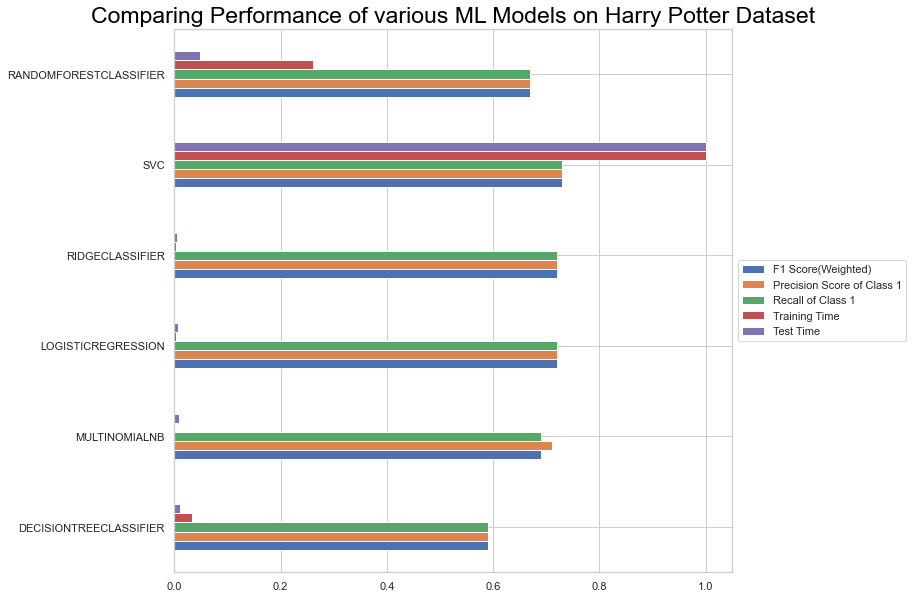

In [122]:
#Plotting the various performance metrix of all models
training_time=np.array(training_time)/np.max(training_time)
test_time=np.array(test_time)/np.max(test_time)
score_df=pd.DataFrame({'F1 Score(Weighted)':f1_array,
                     'Precision Score of Class 1':precision_array,
                     'Recall of Class 1':recall_array,
                      'Training Time': training_time,
                      'Test Time':test_time}, index=model_name)

f=plt.figure(figsize=(10,10))
plt.title('Comparing Performance of various ML Models on Harry Potter Dataset', color='black',
         fontdict={'fontsize':23})
score_df.plot(kind='barh', ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [129]:
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SVC()),
               ])
logreg.fit(X_train, y_train)

# %%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

accuracy 0.7316349912387115
              precision    recall  f1-score   support

  Gryffindor       0.70      0.71      0.71      1695
  Hufflepuff       0.70      0.73      0.71      1867
   Ravenclaw       0.78      0.74      0.76      1940
   Slytherin       0.74      0.75      0.75      1917

    accuracy                           0.73      7419
   macro avg       0.73      0.73      0.73      7419
weighted avg       0.73      0.73      0.73      7419

[[1203  197  128  167]
 [ 169 1355  152  191]
 [ 158  218 1426  138]
 [ 186  172  115 1444]]


<AxesSubplot:>

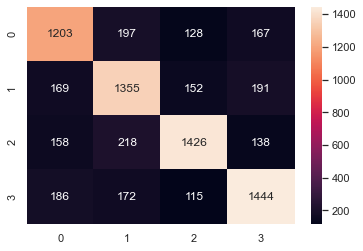

In [130]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True,fmt='g')

In [ ]:
df_small = df.groupby('House',as_index=False).apply(lambda s: s.sample(3500))
df_small.sample(10)

In [ ]:
df_small.groupby(['House', 'label']).count()

In [ ]:
import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

In [ ]:
possible_labels = df.House.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

In [ ]:
df_small['label'] = df_small.House.replace(label_dict)

In [ ]:
df_small.sample(10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_small['Text'], df_small.label, test_size=0.2, random_state=123)

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

In [ ]:
encoded_data_train = tokenizer.batch_encode_plus(
    X_train, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    return_tensors='pt',
    truncation=True,
    max_length=512
)

encoded_data_val = tokenizer.batch_encode_plus(
    X_test, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    return_tensors='pt',
    truncation=True,
    max_length=512
)

In [ ]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(y_train.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(y_test.values)

In [ ]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 3

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)
                  
epochs = 2

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals
    
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    mtqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)


model.load_state_dict(torch.load('BERT_epoch_2.model',))

_, predictions, true_vals = evaluate(dataloader_validation)
accuracy_per_class(predictions, true_vals)

In [ ]:
torch.save(model.state_dict(), f'BERT_epoch_2.model')
        
tqdm.write(f'\nEpoch {epoch}')
loss_train_avg = loss_train_total/len(dataloader_train)            
mtqdm.write(f'Training loss: {loss_train_avg}')
    
val_loss, predictions, true_vals = evaluate(dataloader_validation)
val_f1 = f1_score_func(predictions, true_vals)
tqdm.write(f'Validation loss: {val_loss}')
tqdm.write(f'F1 Score (Weighted): {val_f1}')